# Bayesian Linear Regresion


<img src="http://code2net.com/folder/screenshots/image11.png">

## Part 1 -  Posterior distribution in a linear model

In [3]:

glinear_fit <- function(Alpha, Beta, data, feature_map, target) 
  ## Alpha: prior precision on theta
  ## Beta: noise precision
  ## data: the input variables (x): a matrix with n rows
  #### where n is the sample size
  ##feature_map: the basis function, returning a vector of
  #### size p equal to the dimension of theta
  ## target: the observed values y: a vector of size n
{
  Phi <- t(mapply(feature_map, data))
  p = ncol(Phi)
  Ip = diag(p)
  posterior_variance <- solve(Alpha*Ip + Beta*t(Phi)%*%Phi)
  posterior_mean <- (solve(Alpha/Beta*Ip + t(Phi)%*%Phi)%*%t(Phi))%*%target
  return(list(mean=posterior_mean, cov=posterior_variance))
}


<img src="http://code2net.com/folder/screenshots/image2.png">

In [4]:

#Building Data 
#polynomial basis function model
Fmap <- function(x){c(1, x,x^2,x^3, x^4)}

Theta0 = c(5,2,1,-1,-0.1)
Beta0 = 1
Alpha0 = 1 # Precision on prior theta
n = 100

#Generate data set

generate_data <- function(n, Beta, Theta)
{
  eps <- matrix(rnorm(n , mean = 0, sd = sqrt(1/Beta0)))
  X <- matrix(runif(n,-3,3),nrow = n, ncol = 1) # Represents Data
  Phi <- t(mapply(Fmap,X))
  Y <- (Phi%*%Theta0 + eps) # Represents the target
  return(list(X=X, Y=Y))
}

data = generate_data(n, Beta0, Theta0)

#Fit a model to the generated data using glinear_fit

Estimation <- glinear_fit(Alpha0, Beta0, data$X, Fmap, data$Y)
Estimation


$mean
           [,1]
[1,]  4.7399161
[2,]  1.9233462
[3,]  1.1955909
[4,] -0.9848763
[5,] -0.1210964

$cov
              [,1]          [,2]         [,3]          [,4]          [,5]
[1,]  3.224584e-02  0.0001384564 -0.016743408 -7.904494e-05  0.0017037152
[2,]  1.384564e-04  0.0220751646 -0.002221727 -3.578113e-03  0.0003792721
[3,] -1.674341e-02 -0.0022217274  0.016774845  4.531730e-04 -0.0020797037
[4,] -7.904494e-05 -0.0035781131  0.000453173  6.918316e-04 -0.0000843331
[5,]  1.703715e-03  0.0003792721 -0.002079704 -8.433310e-05  0.0002831798

# Convergance 

We will study the convergance of our method into the real Theta. 
To do so, we will Generate a dataset of size N = 2000 and for n ∈ {1,...,N} compute the posterior means and variance of θ using the first n values of the dataset. Then, we can plot the true value θ0, the graph (as a function of n) of the mean estimators of E (θj |x1:n) and centered 95% posterior credible intervals for each value of n.

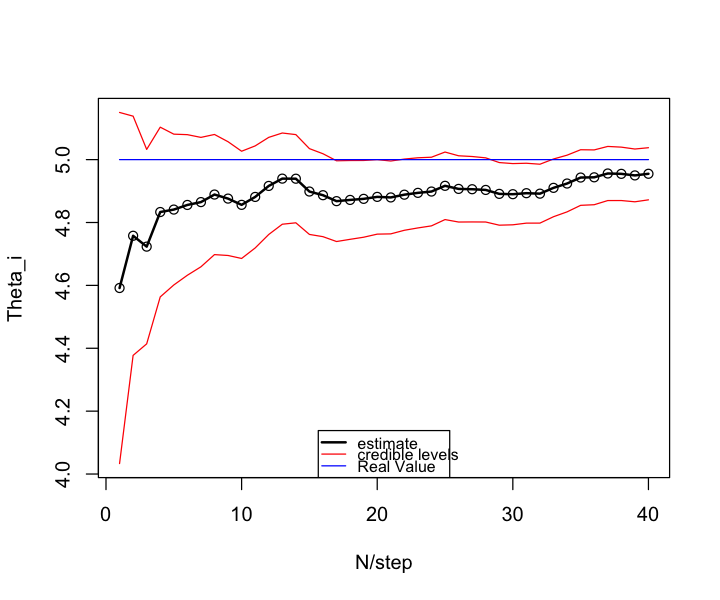

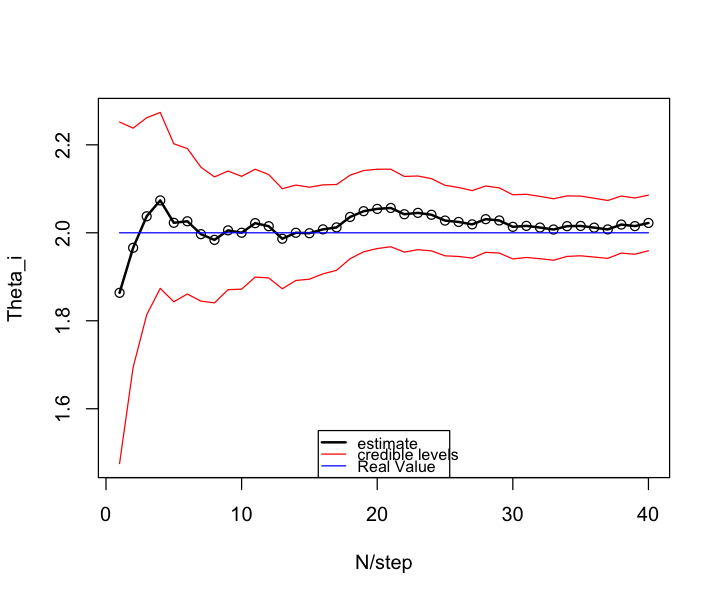

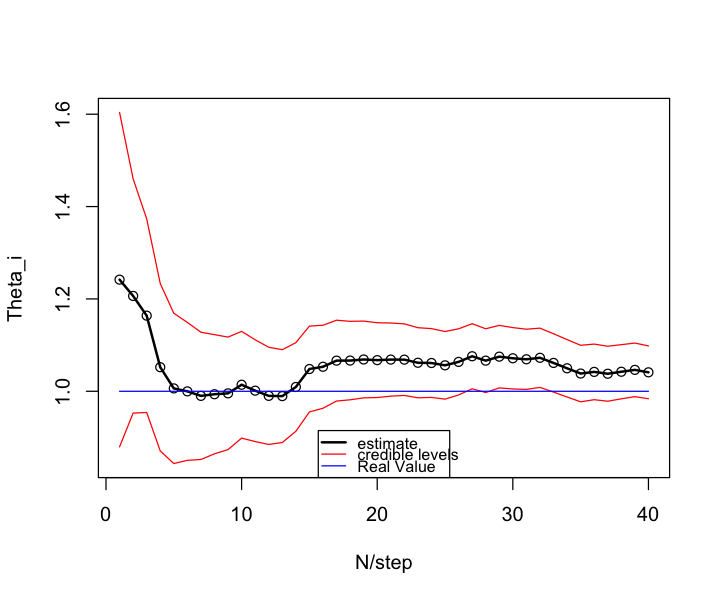

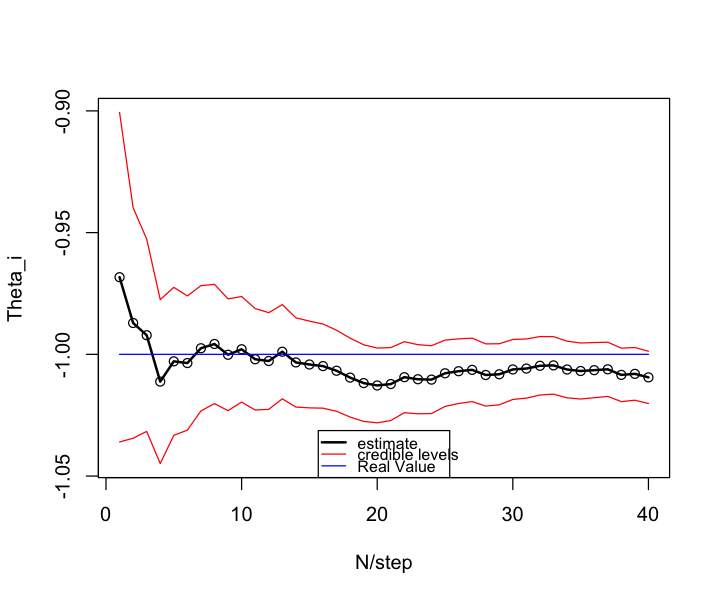

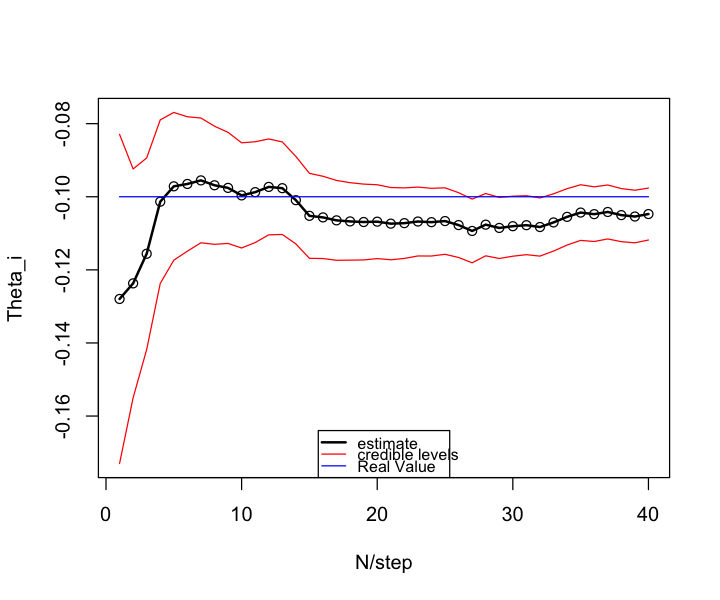

In [16]:
N = 2000
Fmap <- function(x){c(1, x,x^2,x^3,x^4)}

Theta0 = c(5,2,1,-1,-0.1)
Beta0 = 1
Alpha0 = 1 # Precision on prior theta
data = generate_data(n = N, Beta = Beta0, Theta = Theta0)

step = 50
n = seq(from = 1,to = N, by= step)
m = length(n)

mean = 0
cov_diag = 0 
Interv = 0

for (i in 1:m){
  
  model_estimation <- glinear_fit(Alpha0, Beta0, data$X, Fmap, data$Y)
  local_data_X = head(data$X,n = i*step)
  local_data_Y = head(data$Y,n = i*step)
  estimate_sub_set <- glinear_fit(Alpha0, Beta0, local_data_X, Fmap, local_data_Y)
  mean = rbind(mean,estimate_sub_set$mean[,1])
  cov_diag = rbind(cov_diag , diag(estimate_sub_set$cov))
}

# Confidence Intervals

low = mean - 1.96*sqrt(cov_diag)
up =mean + 1.96*sqrt(cov_diag)


for (t in 1:length(Theta0)){ # Indice of Thetha_t
xx <- 1:m
yy <- mean[,t][1:m+1] #Estimated Points 
pp <- rep(Theta0[t],m) #Real Point
lsup <- up[,t][1:m+1]
linf <-low[,t][1:m+1]
plot(xx, yy, lwd=1, ylim=range(lsup,linf), xlab = "N/step",ylab = "Theta_i")
lines(xx[order(xx)], yy[order(xx)], lwd=2)
lines(xx[order(xx)], lsup[order(xx)], col='red')
lines(xx[order(xx)], linf[order(xx)], col='red')
lines(xx, pp, pch=19,col='blue')
legend('bottom', legend=c('estimate', 'credible levels', 'Real Value'),
       col=c('black', 'red', 'blue'),
       pch= c(NA, NA, NA, 19),
       lwd=c(2,1,1,NA),
       ncol = 1,
       cex = 0.8
)
}

# Part 2 - Predictive distribution 

<img src="http://code2net.com/folder/screenshots/post.png">

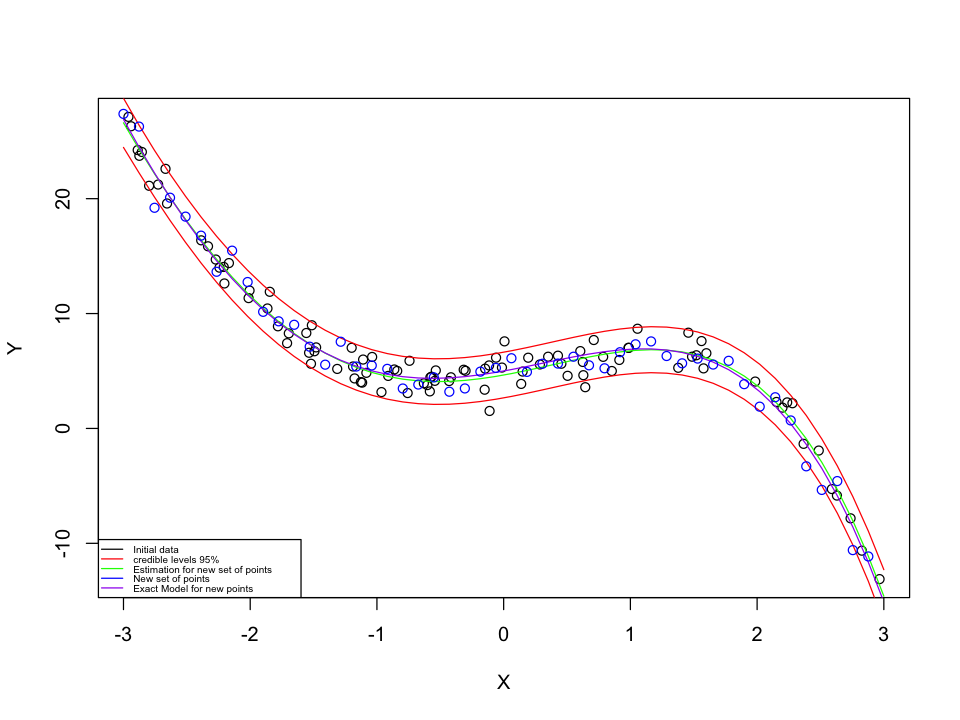

In [25]:

glinear_pred <- function(Alpha, Beta, fitted, data, feature_map) ## Alpha: prior pecision for theta
  ## Beta: noise variance
  ## fitted: the output of glinear_fit: the posterior mean and
  #### variance of the parameter theta.
  ## data: new input data where the predictive distribution
  #### of Y must be computed
  ## feature map: the vector of basis functions
{
    Phi_transpose <- t(mapply(feature_map, data))
    pred_mean <- Phi_transpose %*% fitted$mean
    pred_variance <- Phi_transpose %*% fitted$cov %*% t(Phi_transpose) + 1/Beta
    return(list(mean = pred_mean, variance = diag(pred_variance)))
}


Fmap <- function(x){c(1, x,x^2,x^3, x^4)}

Theta0 = c(5,2,1,-1,-0.1)
Beta0 = 1
Alpha0 = 1 # Precision on prior theta
n = 100

#Generate data set and get the fitted model

data <- generate_data(n, Beta0, Theta0)
fitted_ <- glinear_fit(Alpha0, Beta0, data$X, Fmap, data$Y)

#Plot initial data and model
#plot(data$X,data$Y)


#Prediction
nb = 50

X_new = matrix(seq(-3,3,length.out = nb))
Y_new = t(mapply(Fmap,X_new))%*%Theta0 + rnorm(nb, sd = sqrt(Beta0)^(-1))
nb_ = seq(from = 1,to = nb, by= 1)

Prediction = glinear_pred(Alpha = Alpha0, Beta = Beta0, fitted = fitted_, data = X_new, Fmap)

#Plot

low_pred = Prediction$mean - 1.96*sqrt(Prediction$variance)
up_pred =Prediction$mean + 1.96*sqrt(Prediction$variance)

plot(data$X,data$Y,xlab = 'X', ylab = 'Y')
lines(X_new,Prediction$mean,type = 'l',col='green')
lines(X_new, up_pred, col='red')
lines(X_new, low_pred, col='red')
lines(X_new,t(mapply(Fmap,X_new))%*%Theta0, col = 'purple')
points(X_new, Y_new, col='blue')
legend('bottomleft', legend=c('Initial data', 'credible levels 95%',  'Estimation for new set of points', 'New set of points', 'Exact Model for new points'),
       col=c('black', 'red', 'green','blue','purple'),
       pch= c(NA, NA, NA, NA),
       lwd=c(1,1,1,1),
       ncol = 1,
       cex = 0.5
)


### Part 3 : Empirical Bayes

Draft code in code source
To be finished